## Traffic Signal classification using LeNet Deep Network
- We have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')


## Step 1 : Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open ("./traffic-signs-data/train.p", mode ='rb') as training_data:
    train = pickle.load(training_data)
with open('./traffic-signs-data/valid.p',mode = 'rb') as validation_data:
    valid= pickle.load(validation_data)
with open('./traffic-signs-data/test.p',mode= 'rb') as test_data:
    test= pickle.load(test_data)

In [3]:
X_train, y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'],valid['labels']
X_test, y_test = test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

## Step 2 : Image Exploration

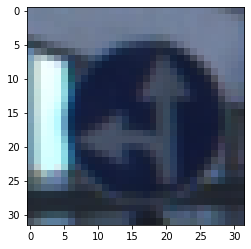

In [10]:
i=5000
plt.imshow(X_train[i])

## Step 3 : Data Preparation

In [11]:
#Shuffle the data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [12]:
X_train_gray= np.sum(X_train/3, axis=3, keepdims= True)
X_validation_gray= np.sum(X_validation/3, axis=3, keepdims= True)
X_test_gray= np.sum(X_test/3, axis=3, keepdims= True)

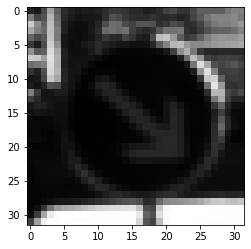

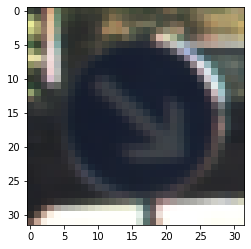

In [13]:
i=40
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [14]:
X_train_norm= (X_train_gray-128)/128
X_valid_norm= (X_validation_gray-128)/128
X_test_norm= (X_test_gray-128)/128

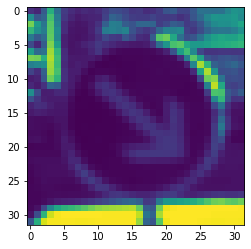

In [15]:
plt.imshow(X_train_norm[40].squeeze())

In [16]:
X_train_norm.shape

(34799, 32, 32, 1)

## Data Modeling

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()

cnn_model.add (Conv2D(filters = 6, kernel_size=(5,5),activation ='relu',input_shape= (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add (Conv2D(filters = 16, kernel_size=(5,5),activation ='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120,activation='relu'))
cnn_model.add(Dense(units = 84,activation='relu'))
cnn_model.add(Dense(units = 43,activation='softmax'))


In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [20]:
cnn_model.compile(loss= 'sparse_categorical_crossentropy',optimizer= Adam(lr=0.001), metrics=['accuracy'])

In [21]:
X_valid_norm.shape

(4410, 32, 32, 1)

In [22]:
history=cnn_model.fit(X_train_norm,y_train,batch_size=500,epochs=50,verbose=1,validation_data= (X_valid_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 21s 300ms/step - loss: 3.1899 - accuracy: 0.1739 - val_loss: 2.7750 - val_accuracy: 0.2694
Epoch 2/50
70/70 [==============================] - 20s 288ms/step - loss: 1.7421 - accuracy: 0.5134 - val_loss: 1.5408 - val_accuracy: 0.5637
Epoch 3/50
70/70 [==============================] - 21s 295ms/step - loss: 0.9770 - accuracy: 0.7150 - val_loss: 1.0565 - val_accuracy: 0.7039
Epoch 4/50
70/70 [==============================] - 20s 288ms/step - loss: 0.6682 - accuracy: 0.8129 - val_loss: 0.8684 - val_accuracy: 0.7404
Epoch 5/50
70/70 [==============================] - 22s 312ms/step - loss: 0.5285 - accuracy: 0.8547 - val_loss: 0.7790 - val_accuracy: 0.7825
Epoch 6/50
70/70 [==============================] - 890s 13s/step - loss: 0.4338 - accuracy: 0.8847 - val_loss: 0.7073 - val_accuracy: 0.8070
Epoch 7/50
70/70 [==============================] - 21s 304ms/step - loss: 0.3679 - accuracy: 0.9036 - val_loss: 0.7552 - val_accuracy: 0.7993


## Model Evaluation

In [23]:
score=cnn_model.evaluate(X_test_norm,y_test)
print('Test Accuracy : {:.4f}'.format(score[1]))

395/395 [==============================] - 5s 13ms/step - loss: 1.2650 - accuracy: 0.8671
Test Accuracy : 0.8671


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

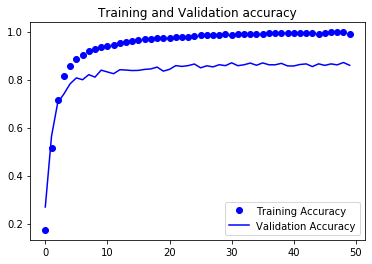

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
#Plotting Training accuracy vs validation accuracy
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

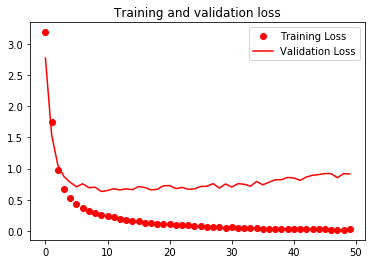

In [26]:
#Training loss vs validation loss
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
predicted_classes= cnn_model.predict_classes(X_test_norm)
#get the indices to be plotted
y_true = y_test


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


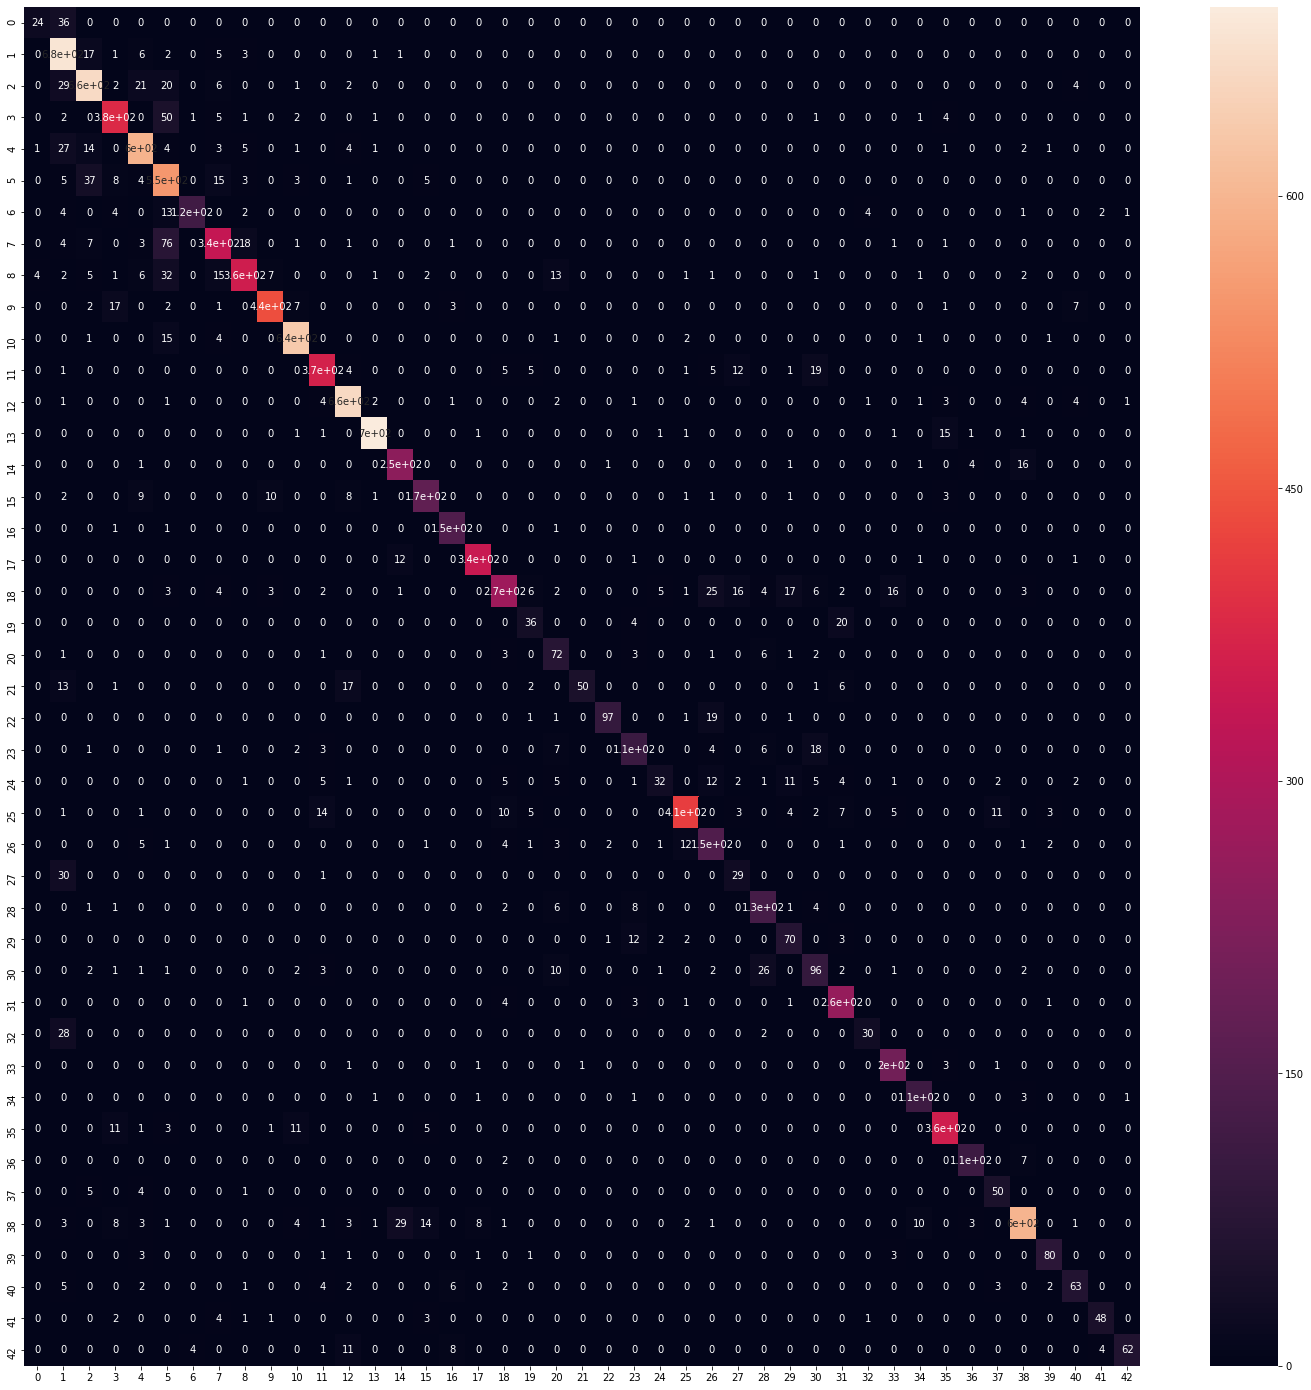

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

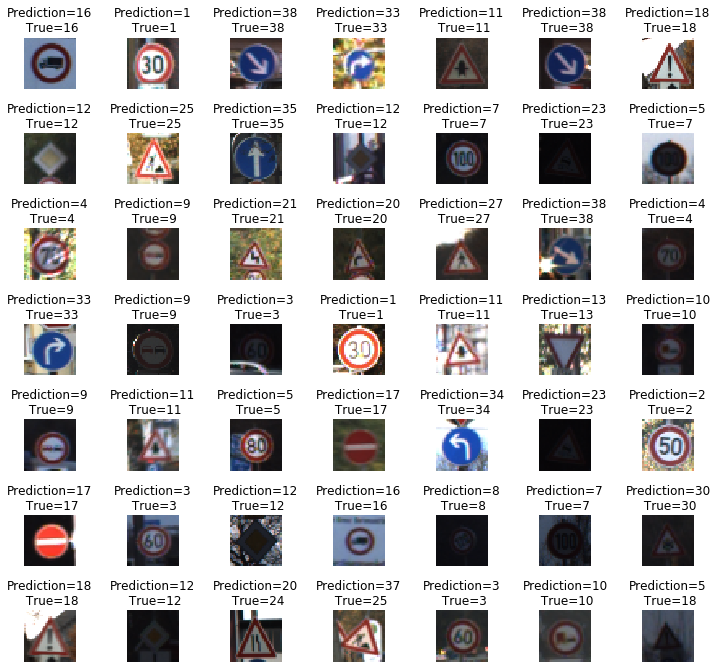

In [36]:
#Visualizing True value and predicted value
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)